# Импорт библиотек

In [1]:
import pandas as pd
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.preprocessing import LabelEncoder
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.decomposition import PCA

In [2]:
import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.float_format', lambda x: '%.2f' % x)

# Загрузка данных

In [3]:
data = pd.read_csv('data/train_data.csv')

In [4]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.00,1,0,A/5 21171,7.25,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00,1,0,PC 17599,71.28,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.00,0,0,STON/O2. 3101282,7.92,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00,1,0,113803,53.10,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.00,0,0,373450,8.05,NaN,S


# Подготовка данных

In [5]:
data.Age = data.Age.fillna(data.Age.mean())
data.Ticket = data.Ticket.fillna("_MISSING_")
data.Fare = data.Fare.fillna(-999)
data.Embarked = data.Embarked.fillna("_MISSING_")
data = data.drop(["Cabin"], axis=1)

In [6]:
for column in ["Name", "Sex", "Ticket", "Embarked"]:
    label_encoder = LabelEncoder()
    data[column] = label_encoder.fit_transform(data[column])

In [7]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,108,1,22.00,1,0,523,7.25,2
1,2,1,1,190,0,38.00,1,0,596,71.28,0
2,3,1,3,353,0,26.00,0,0,669,7.92,2
3,4,1,1,272,0,35.00,1,0,49,53.10,2
4,5,0,3,15,1,35.00,0,0,472,8.05,2


# Разбиение датасета на входные данные и целевой признак

In [8]:
X = data.drop(["Survived"], axis=1)
y = data.Survived

In [9]:
X.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,3,108,1,22.00,1,0,523,7.25,2
1,2,1,190,0,38.00,1,0,596,71.28,0
2,3,3,353,0,26.00,0,0,669,7.92,2
3,4,1,272,0,35.00,1,0,49,53.10,2
4,5,3,15,1,35.00,0,0,472,8.05,2


# Обучение, кластеризация, визуализация и оценка результата

In [10]:
x_transformed = pd.DataFrame(PCA(n_components=2).fit_transform(X))

In [11]:
k_means = KMeans()
agglomerative_clustering = AgglomerativeClustering()

K-Means silhouette_score = 0.2704834038067877
K-Means davies_bouldin_score = 1.1194359904481925


Agglomerative clustering silhouette_score = 0.24709054622753293
Agglomerative clustering davies_bouldin_score = 1.5708603239727086




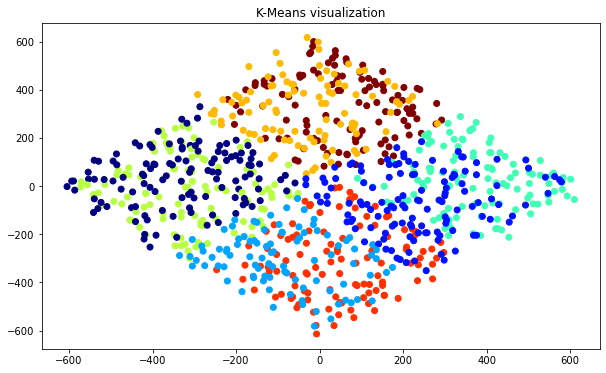

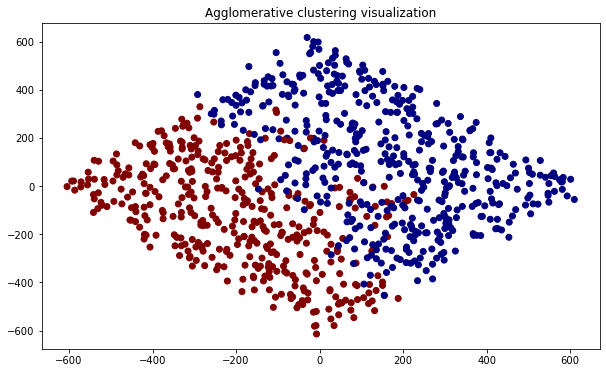

In [12]:
for model, model_name in [(k_means, "K-Means"), (agglomerative_clustering, "Agglomerative clustering")]:
    clusters = model.fit_predict(X)
    print(f"{model_name} silhouette_score = {silhouette_score(X, clusters)}")
    print(f"{model_name} davies_bouldin_score = {davies_bouldin_score(X, clusters)}")
    print('\n')
    plt.figure(figsize=(10, 6))
    plt.title(f"{model_name} visualization")
    plt.scatter(x_transformed.iloc[:, 0], x_transformed.iloc[:, 1], c=clusters, cmap="jet");